# Regional Analysis

## Datasets

In [1]:
!gdown 19EWhcGURNRhE4hFvMDMJZKB6oc3EA5eY
!gdown 14vNkyHYJ6P108hdLPCyYkTTDnR7VjXyY

Downloading...
From: https://drive.google.com/uc?id=19EWhcGURNRhE4hFvMDMJZKB6oc3EA5eY
To: /content/CogNet-v2.0.tsv
100% 382M/382M [00:07<00:00, 52.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=14vNkyHYJ6P108hdLPCyYkTTDnR7VjXyY
To: /content/languoid.csv
100% 1.92M/1.92M [00:00<00:00, 14.0MB/s]


## Cognate Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# File location for cognate dataset
cognate_data_file_location='/content/CogNet-v2.0.tsv'

In [4]:
#Read data
file1= open(cognate_data_file_location,'r',encoding='utf-8')
c_data = file1.readlines()[1:]

In [5]:
# Pre-process
concept_sets={}
languages=set()
lang2concept_map={}


for data in c_data:
  data_details=data.split('\t')
  languages.add(data_details[1])
  languages.add(data_details[3])

  # Populating language to concept map
  if data_details[1] in lang2concept_map:
    lang2concept_map[data_details[1]].add(data_details[0])
  else:
    lang2concept_map[data_details[1]] = {data_details[0]}

  if data_details[3] in lang2concept_map:
    lang2concept_map[data_details[3]].add(data_details[0])
  else:
    lang2concept_map[data_details[3]] = {data_details[0]}

  # Populating concepts sets itself.
  if data_details[0] in concept_sets:
    concept_sets[data_details[0]].add(tuple((data_details[1],data_details[2])))
    concept_sets[data_details[0]].add(tuple((data_details[3],data_details[4])))
  else:
    concept_sets[data_details[0]] = {tuple((data_details[1],data_details[2])),tuple((data_details[3],data_details[4]))}

In [6]:
# Understanding the data

print("Number of languages in the cognate dataset:", len(languages))
print("Number of concepts sets:",len(concept_sets))
print("Example of a concept set:", list(concept_sets.items())[4])
print("Number of cognate pairs for all concepts:", len(c_data))

Number of languages in the cognate dataset: 339
Number of concepts sets: 90117
Example of a concept set: ('n05820620', {('mya', 'နမူနာ'), ('cmn', '例'), ('eng', 'instance'), ('eng', 'example'), ('kor', '例'), ('nob', 'eksempel'), ('arb', 'مِثَال'), ('msa', 'misal'), ('isl', 'dæmi'), ('slv', 'primerek'), ('hye', 'օրինակ'), ('ind', 'misal'), ('dsb', 'pśikład'), ('sqi', 'ilustrim'), ('jpn', '事例'), ('jpn', '代表'), ('tur', 'örnek'), ('jpn', '例'), ('hin', 'नमूना'), ('tgl', 'ilustrasyon'), ('hin', 'मिसाल'), ('slv', 'primer'), ('spa', 'ejemplo'), ('ita', 'esempio'), ('por', 'exemplo'), ('ron', 'instanță'), ('cat', 'exemple'), ('ast', 'exemplu'), ('dan', 'eksempel'), ('zho', '事例'), ('fra', 'illustration'), ('zho', '代表'), ('zsm', 'contoh'), ('msa', 'andai'), ('lat', 'exemplum'), ('mkd', 'пример'), ('hrv', 'primjer'), ('nno', 'døme'), ('ind', 'andai'), ('nno', 'eksempel'), ('rus', 'иллюстрация'), ('slk', 'príklad'), ('slk', 'ilustrácia'), ('zsm', 'misal'), ('ces', 'ilustrace'), ('eng', 'illustration

## Region data

In [7]:
# File location for language-region dataset
lag_region_map_data_file='/content/languoid.csv'

In [8]:
# Reading the regions of the languages and looking at data

region_data=pd.read_csv(lag_region_map_data_file)
region_data.head()

,id,family_id,parent_id,name,bookkeeping,level,latitude,longitude,iso639P3code,description,markup_description,child_family_count,child_language_count,child_dialect_count,country_ids
0,3adt1234,afro1255,nort3292,3Ad-Tekles,False,dialect,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
1,aala1237,aust1307,ramo1244,Aalawa,False,dialect,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
2,aant1238,nucl1709,nort2920,Aantantara,False,dialect,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
3,aari1238,sout2845,ahkk1235,Aari-Gayil,False,family,NaN,NaN,aiz,NaN,NaN,0,2,0,NaN
4,aari1239,sout2845,aari1238,Aari,False,language,5.95034,36.5721,aiw,NaN,NaN,0,0,0,ET


In [9]:
# Transforming data

region_map = region_data.loc[region_data['iso639P3code'].notnull(), ['iso639P3code','latitude','longitude']]
region_map = region_map.loc[region_map['latitude'].notnull()]
region_map = region_map.loc[region_map['longitude'].notnull()]

mask = region_map['iso639P3code'].isin(languages)
region_map = region_map[mask]

region_map = region_map.sort_values(['latitude', 'longitude'], ascending=[True, True])
region_map.head()

,iso639P3code,latitude,longitude
13445,mri,-38.2881,176.5410
15331,nay,-36.2301,140.1580
25830,xho,-31.0389,28.0769
26647,zul,-28.9000,30.2000
21468,sot,-28.7800,27.8900


In [10]:
languages= [lang for lang in list(region_map['iso639P3code']) ]
lang2lang_concepts =  [[set() for k in range(len(languages))] for j in range(len(languages))]

for data in c_data:
  data_details=data.split('\t')
  if (data_details[1] in languages) and (data_details[3] in languages):
    lang2lang_concepts[languages.index(data_details[1])][languages.index(data_details[3])].add(data_details[0])

In [11]:
print("Thus the languages in both datasets: ", len(languages))

Thus the languages in both datasets:  328


## Experiments (with different definitions of region)

### Base utility functions

In [12]:
from cycler import L
# Matrix of languages in same region
import geopy.distance

def within_radius(lat1,lon1,lat2,lon2,r):
  coords_1 = (lat1, lon1)
  coords_2 = (lat2, lon2)
  return geopy.distance.geodesic(coords_1, coords_2).km <= 2*r

def colocation_matrix(radius,l):
  co_located_lang = np.zeros((len(l),len(l)))

  for i in range(len(l)):
    for j in range(i+1,len(l)):
      location1 = region_map.loc[(region_map['iso639P3code']==l[i])]
      if location1.empty:
        continue
      lat1 = location1['latitude'].values[0]
      lon1 = location1['longitude'].values[0]

      location2 = region_map.loc[(region_map['iso639P3code']==l[j])]
      if location2.empty:
        continue
      lat2 = location2['latitude'].values[0]
      lon2 = location2['longitude'].values[0]

      if (within_radius(lat1,lon1,lat2,lon2,radius)):
        co_located_lang[i][j] = 1

  print('Indentified co_located language pairs:',np.sum(co_located_lang))
  print('Total possible pairs:' , (len(l)*(len(l)-1))/2)
  return co_located_lang

In [13]:
def visualize_cognate_counts(l,loc_labels, concept_count,countrywise = False):
  data=[]
  label=[]
  max_pair_cnts_1 =0
  max_lang1_1 =''
  max_lang2_1 = ''

  if countrywise:
    max_pair_cnts_0 =10e9
  else:
    max_pair_cnts_0 =0
  max_lang1_0 =''
  max_lang2_0 = ''



  for i in range(len(l)):
    for j in range(i+1,len(l)):
      if countrywise:
        data.append(concept_count[i][j])
        label.append(1)
      else:
        data.append(len(concept_count[i][j])+len(concept_count[j][i]))
        label.append(loc_labels[i][j])

      if countrywise:
        if(max_pair_cnts_1 < concept_count[i][j]):
          max_pair_cnts_1=concept_count[i][j]
          max_lang1_1=l[i]
          max_lang2_1=l[j]

        if(max_pair_cnts_0 > concept_count[i][j]):
          max_pair_cnts_0=concept_count[i][j]
          max_lang1_0=l[i]
          max_lang2_0=l[j]
      else:
        if loc_labels[i][j]==1:
          if(max_pair_cnts_1 < len(concept_count[i][j])+len(concept_count[j][i])):
            max_pair_cnts_1=len(concept_count[i][j])+len(concept_count[j][i])
            max_lang1_1=l[i]
            max_lang2_1=l[j]

        if loc_labels[i][j]==0:
          if(max_pair_cnts_0 < len(concept_count[i][j])+len(concept_count[j][i])):
            max_pair_cnts_0=len(concept_count[i][j])+len(concept_count[j][i])
            max_lang1_0=l[i]
            max_lang2_0=l[j]

  plt.scatter(data, label, c=label, cmap='viridis')
  plt.xlabel('Common word counts')
  plt.ylabel('Same region or not')
  plt.title('Cognate counts')

  print("For laguages in same locations, maximum common cognates are found between: ",max_lang1_1," and ",max_lang2_1, ".\n Total borrowed words in dataset: ",max_pair_cnts_1)
  if countrywise==False:
    print("For laguages not in same locations, maximum common cognates are found between: ",max_lang1_0," and ",max_lang2_0, ".\n Total borrowed words in dataset: ",max_pair_cnts_0)
  else:
    print("For laguages in same locations, minimum common cognates are found between: ",max_lang1_0," and ",max_lang2_0, ".\n Total borrowed words in dataset: ",max_pair_cnts_0)
  plt.show()

  print("Lets look at original number of concepts for each language above independently:")
  print(max_lang1_1, ":" , len(lang2concept_map[max_lang1_1]))
  print(max_lang2_1, ":" , len(lang2concept_map[max_lang2_1]))
  print(max_lang1_0, ":" , len(lang2concept_map[max_lang1_0]))
  print(max_lang2_0, ":" , len(lang2concept_map[max_lang2_0]))

### Search Radius 1000km (~20 degrees)

In [14]:
radius = 1000
co_located_lang = colocation_matrix(radius,languages)

Indentified co_located language pairs: 6455.0
Total possible pairs: 53628.0


For laguages in same locations, maximum common cognates are found between:  fra  and  eng .
 Total borrowed words in dataset:  38122
For laguages not in same locations, maximum common cognates are found between:  spa  and  ron .
 Total borrowed words in dataset:  16944


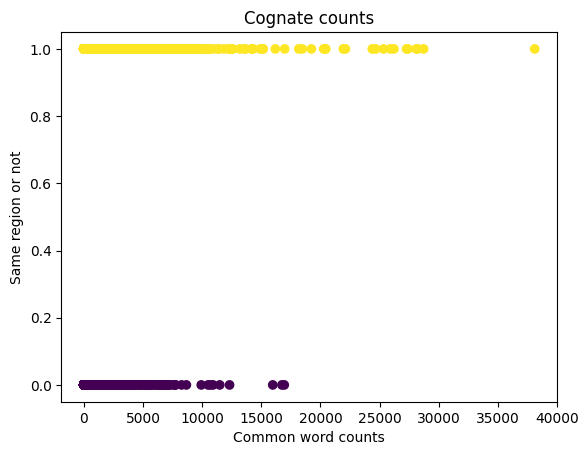

Lets look at original number of concepts for each language above independently:
fra : 48719
eng : 64241
spa : 43128
ron : 30468


In [15]:
# Comparing
visualize_cognate_counts(languages,co_located_lang,lang2lang_concepts)

### Search Radius 2000km (~40 degrees)

In [16]:
radius = 2000
co_located_lang = colocation_matrix(radius,languages)

Indentified co_located language pairs: 15112.0
Total possible pairs: 53628.0


For laguages in same locations, maximum common cognates are found between:  fra  and  eng .
 Total borrowed words in dataset:  38122
For laguages not in same locations, maximum common cognates are found between:  ind  and  eng .
 Total borrowed words in dataset:  7754


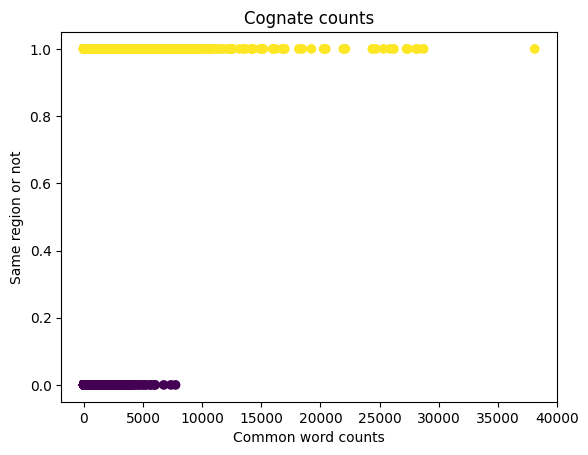

Lets look at original number of concepts for each language above independently:
fra : 48719
eng : 64241
ind : 31368
eng : 64241


In [17]:
# Comparing
visualize_cognate_counts(languages,co_located_lang,lang2lang_concepts)

### Different latitude and longitude radius

In [18]:
lt_radius = 2000
lng_radius = 1000
co_located_lang = np.zeros((len(languages),len(languages)))

def within_radius(lat1,lon1,lat2,lon2,r):
  coords_1 = (lat1, lon1)
  coords_2 = (lat2, lon2)
  return geopy.distance.geodesic(coords_1, coords_2).km <= 2*r

for i in range(len(languages)):
  for j in range(i+1,len(languages)):
    location1 = region_map.loc[(region_map['iso639P3code']==languages[i])]
    if location1.empty:
      continue
    lat1 = location1['latitude'].values[0]
    lon1 = location1['longitude'].values[0]

    location2 = region_map.loc[(region_map['iso639P3code']==languages[j])]
    if location2.empty:
      continue
    lat2 = location2['latitude'].values[0]
    lon2 = location2['longitude'].values[0]

    if (within_radius(lat1,lon1,lat2,lon1,lt_radius) and within_radius(lat1,lon1,lat1,lon2,lng_radius)):
      co_located_lang[i][j] = 1

print('Indentified co_located language pairs:',np.sum(co_located_lang))
print('Total possible pairs:' , (len(languages)*(len(languages)-1))/2)

Indentified co_located language pairs: 9329.0
Total possible pairs: 53628.0


For laguages in same locations, maximum common cognates are found between:  fra  and  eng .
 Total borrowed words in dataset:  38122
For laguages not in same locations, maximum common cognates are found between:  spa  and  ron .
 Total borrowed words in dataset:  16944


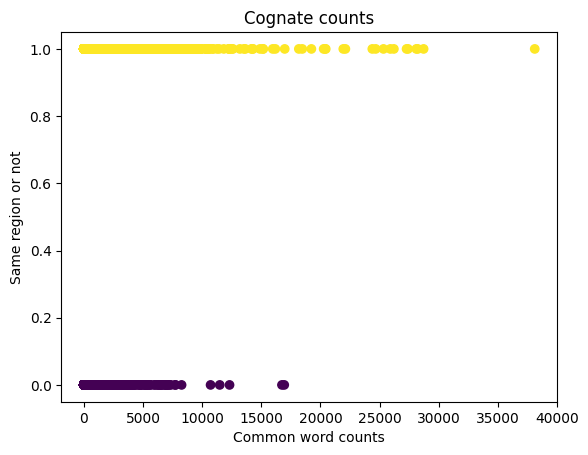

Lets look at original number of concepts for each language above independently:
fra : 48719
eng : 64241
spa : 43128
ron : 30468


In [19]:
# Comparing
visualize_cognate_counts(languages,co_located_lang,lang2lang_concepts)

### Search Radius : Country

We are performing analysis of:
1. China
2. USA
3. Finland
4. Indonesia
5. UK

Site Used to get country latitude and longitude: https://www.mapsofworld.com/lat_long/

In [20]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import pandas as pd

def country_polygon(corners):
  return Polygon(corners)

def in_country(country_polygon,lat,lon):
  return country_polygon.contains(Point(lat,lon))

def country_languages(country):
  lang_in_country = []
  for i in range(len(languages)):
    location1 = region_map.loc[(region_map['iso639P3code']==languages[i])]
    lat1 = location1['latitude'].values[0]
    lon1 = location1['longitude'].values[0]
    if in_country(country,lat1,lon1):
      lang_in_country.append(languages[i])
  return lang_in_country

def create_country_lang2lang_concepts(country_langs):
  country_lang2lang_concepts = [[set() for k in range(len(country_langs))] for j in range(len(country_langs))]
  for i in range(len(country_langs)):
    for j in range(i+1,len(country_langs)):
      country_lang2lang_concepts[i][j] = len(lang2lang_concepts[languages.index(country_langs[i])][languages.index(country_langs[j])]) + len(lang2lang_concepts[languages.index(country_langs[j])][languages.index(country_langs[i])])

  return country_lang2lang_concepts

def visualize_countrywise_lang(country_lang2lang_concepts, country_languages):
  df = pd.DataFrame(country_lang2lang_concepts, columns=country_languages, index=country_languages)
  print(df)

#### China

In [21]:
china = country_polygon([(47,88), (39, 75), (29, 91), (20, 110),(31,121),(45,126),(49,119),(42,105)])
lang_in_china = country_languages(china)

In [22]:
print("Languages identified in China:\n", lang_in_china)

Languages identified in China:
 ['gan', 'iii', 'wuu', 'sce', 'cmn', 'uig']


In [23]:

china_lang2lang_concepts = create_country_lang2lang_concepts(lang_in_china)
visualize_countrywise_lang(china_lang2lang_concepts,lang_in_china)

    gan iii wuu sce cmn uig
gan  {}   0   3   0  17   2
iii  {}  {}   0   0   1   0
wuu  {}  {}  {}   0  15   0
sce  {}  {}  {}  {}   0   0
cmn  {}  {}  {}  {}  {}  11
uig  {}  {}  {}  {}  {}  {}


#### USA

In [24]:
usa = country_polygon([(30,-120),(30,-70),(50,-70),(50,-120)])
lang_in_usa = country_languages(usa)
print("Languages identified in USA:\n", lang_in_usa)

Languages identified in USA:
 ['akz', 'ood', 'cho', 'mrc', 'apw', 'chr', 'hop', 'nav', 'twf', 'pim', 'pdc', 'pot', 'chy', 'dak', 'abe', 'lkt', 'alq']


In [25]:
usa_lang2lang_concepts = create_country_lang2lang_concepts(lang_in_usa)
visualize_countrywise_lang(usa_lang2lang_concepts,lang_in_usa)

    akz ood cho mrc apw chr hop nav twf pim pdc pot chy dak abe lkt alq
akz  {}   0   2   0   0   0   0   0   0   0   1   0   0   0   3   0   0
ood  {}  {}   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
cho  {}  {}  {}   0   0   0   0   0   3   0   0   0   0   0   0   0   0
mrc  {}  {}  {}  {}   0   0   0   0   0   0   0   0   0   0   0   0   0
apw  {}  {}  {}  {}  {}   0   0   8   0   0   0   0   0   0   0   0   0
chr  {}  {}  {}  {}  {}  {}   0   0   0   0   2   0   0   0   0   0   0
hop  {}  {}  {}  {}  {}  {}  {}   1   0   0   0   0   0   0   0   0   0
nav  {}  {}  {}  {}  {}  {}  {}  {}   5   0   0   0   0   0   0   1   0
twf  {}  {}  {}  {}  {}  {}  {}  {}  {}   0   0   0   0   0   0   0   0
pim  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}   0   0   0   0   1   0   0
pdc  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}   0   0   0   0   0   0
pot  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}   0   0   1   0   0
chy  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}   0   0 

#### Finland

In [26]:
finland = country_polygon([(20,60),(20,70),(30,60),(30,70)])
lang_in_finland = country_languages(finland)
print("Languages identified in Finland:\n", lang_in_finland)

Languages identified in Finland:
 []


In [27]:
finland_lang2lang_concepts = create_country_lang2lang_concepts(lang_in_finland)
visualize_countrywise_lang(finland_lang2lang_concepts,lang_in_finland)

Empty DataFrame
Columns: []
Index: []


#### Indonesia

In [28]:
indonesia = country_polygon([(-10,100),(-10,140),(5,100),(5,140)])
lang_in_indonesia = country_languages(indonesia)
print("Languages identified in Indonesia:\n", lang_in_indonesia)

Languages identified in Indonesia:
 ['aoz', 'tet', 'ban', 'ind', 'jav', 'mad', 'bug', 'bjn', 'sne', 'mel']


In [29]:
indonesia_lang2lang_concepts = create_country_lang2lang_concepts(lang_in_indonesia)
visualize_countrywise_lang(indonesia_lang2lang_concepts,lang_in_indonesia)

    aoz tet ban ind  jav mad bug bjn sne mel
aoz  {}   0   1   2    1   0   1   0   0   1
tet  {}  {}   1  50   21   1   2   1   0   1
ban  {}  {}  {}  12    7   2   1   1   0   1
ind  {}  {}  {}  {}  312   4   7  20   9  22
jav  {}  {}  {}  {}   {}   7   5  14   1   8
mad  {}  {}  {}  {}   {}  {}   1   2   0   0
bug  {}  {}  {}  {}   {}  {}  {}   1   0   0
bjn  {}  {}  {}  {}   {}  {}  {}  {}   0   3
sne  {}  {}  {}  {}   {}  {}  {}  {}  {}   5
mel  {}  {}  {}  {}   {}  {}  {}  {}  {}  {}


#### UK

In [30]:
uk = country_polygon([(50,-7),(50,2),(58,-7),(58,2)])
lang_in_uk = country_languages(uk)
print("Languages identified in UK:\n", lang_in_uk)

Languages identified in UK:
 ['cor', 'cym', 'sco', 'gla']


In [31]:
uk_lang2lang_concepts = create_country_lang2lang_concepts(lang_in_uk)
visualize_countrywise_lang(uk_lang2lang_concepts,lang_in_uk)

    cor  cym  sco  gla
cor  {}  412   90  220
cym  {}   {}  149  493
sco  {}   {}   {}  151
gla  {}   {}   {}   {}


### Country analysis from Dataset itself

In [32]:
country_ids = []
_ = [country_ids.extend(cid) for cid in [str(cids).split() for cids in list(region_data['country_ids'])]]
country_ids2 = set(country_ids)
country_ids2.remove('nan')

In [33]:
country_region_map = region_data.loc[region_data['country_ids'].notnull(), ['iso639P3code','country_ids']]

mask = country_region_map['iso639P3code'].isin(languages)
country_region_map = country_region_map[mask]

country_region_map.head()

,iso639P3code,country_ids
32,abq,RU TR
57,abk,GE RU TR
101,ace,ID
170,ady,IL JO RU SY TR
198,afr,BW MZ NA ZA ZM ZW


In [34]:
lang2country_dict = country_region_map.set_index('iso639P3code').to_dict()
lang2country_dict = lang2country_dict['country_ids']
country2lang = {}

for country in country_ids:
  for lang in languages:
    if(country in lang2country_dict[lang]):
      if country in country2lang:
        country2lang[country].add(lang)
      else:
        country2lang[country] = {lang}

#### China

In [35]:
lang_in_cn = list(country2lang['CN'])
print("Languages identified in China:\n", lang_in_cn)
print(len(lang_in_cn), " languages were identified")

cn_lang2lang_concepts = create_country_lang2lang_concepts(lang_in_cn)

Languages identified in China:
 ['bod', 'wuu', 'hak', 'mnc', 'kjh', 'kor', 'xal', 'evn', 'vie', 'gan', 'uig', 'blt', 'alt', 'tgk', 'sce', 'rus', 'yue', 'cdo', 'kaz', 'tyv', 'cmn', 'dzo', 'iii', 'gld', 'tat', 'kir']
26  languages were identified


For laguages in same locations, maximum common cognates are found between:  yue  and  cmn .
 Total borrowed words in dataset:  1417
For laguages in same locations, minimum common cognates are found between:  bod  and  wuu .
 Total borrowed words in dataset:  0


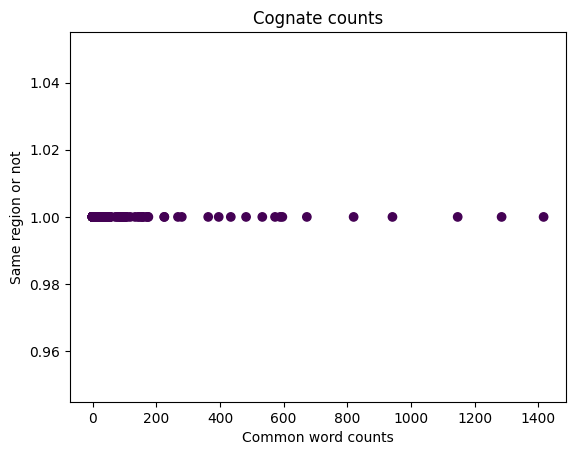

Lets look at original number of concepts for each language above independently:
yue : 2043
cmn : 41250
bod : 86
wuu : 18


In [36]:
# Comparing
visualize_cognate_counts(lang_in_cn,[],cn_lang2lang_concepts,countrywise=True)

In [37]:
visualize_countrywise_lang(cn_lang2lang_concepts,lang_in_cn)

    bod wuu hak mnc kjh kor xal evn  vie gan  ...   yue cdo   kaz tyv   cmn  \
bod  {}   0   0   0   2   4   3   0    5   0  ...     0   0     4   1     4   
wuu  {}  {}   2   1   0   6   0   1    2   3  ...     9   3     0   0    15   
hak  {}  {}  {}   1   0  24   0   1   15   2  ...  1147   2     1   0   573   
mnc  {}  {}  {}  {}   1   3   2   3    1   1  ...     1   1     0   0     6   
kjh  {}  {}  {}  {}  {}  14  23  38   16   2  ...     0   0    88  89     2   
kor  {}  {}  {}  {}  {}  {}  20  13  589   8  ...   118   3   225  16   673   
xal  {}  {}  {}  {}  {}  {}  {}  22   32   0  ...     1   0    55  34     6   
evn  {}  {}  {}  {}  {}  {}  {}  {}   15   3  ...     3   1    25  36     3   
vie  {}  {}  {}  {}  {}  {}  {}  {}   {}   3  ...    80   3   225  15   434   
gan  {}  {}  {}  {}  {}  {}  {}  {}   {}  {}  ...    18   2     0   2    17   
uig  {}  {}  {}  {}  {}  {}  {}  {}   {}  {}  ...     1   0   154  35    11   
blt  {}  {}  {}  {}  {}  {}  {}  {}   {}  {}  ...   

#### USA

In [38]:
lang_in_us = list(country2lang['US'])
print("Languages identified in US:\n", lang_in_us)
print(len(lang_in_us), " languages were identified")

us_lang2lang_concepts = create_country_lang2lang_concepts(lang_in_us)

Languages identified in US:
 ['fra', 'ems', 'apw', 'mrc', 'pim', 'lkt', 'haw', 'spa', 'akz', 'chn', 'pdc', 'pot', 'ind', 'twf', 'esu', 'abe', 'hif', 'cho', 'kri', 'ale', 'dak', 'chy', 'chr', 'nav', 'lad', 'hop', 'pms', 'eng', 'ood', 'mic']
30  languages were identified


For laguages in same locations, maximum common cognates are found between:  fra  and  eng .
 Total borrowed words in dataset:  38122
For laguages in same locations, minimum common cognates are found between:  fra  and  apw .
 Total borrowed words in dataset:  0


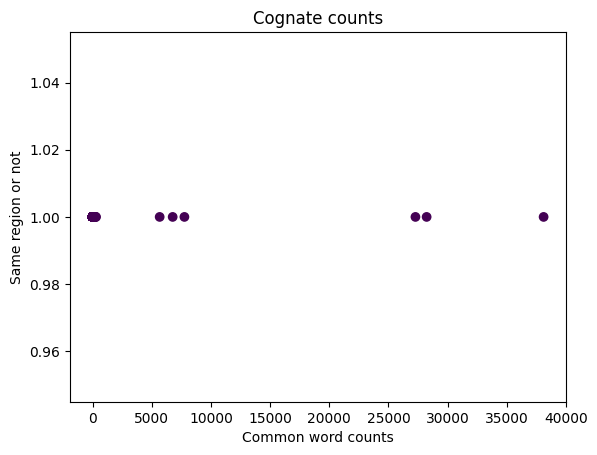

Lets look at original number of concepts for each language above independently:
fra : 48719
eng : 64241
fra : 48719
apw : 11


In [39]:
# Comparing
visualize_cognate_counts(lang_in_us,[],us_lang2lang_concepts,countrywise=True)

In [40]:
visualize_countrywise_lang(us_lang2lang_concepts,lang_in_us)

    fra ems apw mrc pim lkt  haw    spa akz chn  ... dak chy chr nav lad hop  \
fra  {}   1   0   0   0   7  165  28232   7   6  ...   1   0  19  25  40   2   
ems  {}  {}   0   0   0   0    2      0   1   0  ...   0   0   0   0   0   0   
apw  {}  {}  {}   0   0   0    0      0   0   0  ...   0   0   0   8   0   0   
mrc  {}  {}  {}  {}   0   0    0      0   0   0  ...   0   0   0   0   0   0   
pim  {}  {}  {}  {}  {}   0    0      0   0   0  ...   0   0   0   0   0   0   
lkt  {}  {}  {}  {}  {}  {}    1      5   0   1  ...  37   0   0   1   0   0   
haw  {}  {}  {}  {}  {}  {}   {}    163   8   2  ...   0   0   2   6   7   1   
spa  {}  {}  {}  {}  {}  {}   {}     {}   6   3  ...   1   0  15  35  44   2   
akz  {}  {}  {}  {}  {}  {}   {}     {}  {}   0  ...   0   0   0   0   1   0   
chn  {}  {}  {}  {}  {}  {}   {}     {}  {}  {}  ...   0   0   0   2   0   0   
pdc  {}  {}  {}  {}  {}  {}   {}     {}  {}  {}  ...   0   0   2   0   0   0   
pot  {}  {}  {}  {}  {}  {}   {}     {} 

#### Finland

In [41]:
lang_in_fi = list(country2lang['FI'])
print("Languages identified in Finland:\n", lang_in_fi)
print(len(lang_in_fi), " languages were identified")

fi_lang2lang_concepts = create_country_lang2lang_concepts(lang_in_fi)

Languages identified in Finland:
 ['swe', 'rus', 'rmf', 'krl', 'sme', 'sms', 'smn', 'tat', 'fin']
9  languages were identified


For laguages in same locations, maximum common cognates are found between:  swe  and  fin .
 Total borrowed words in dataset:  4914
For laguages in same locations, minimum common cognates are found between:  rmf  and  krl .
 Total borrowed words in dataset:  0


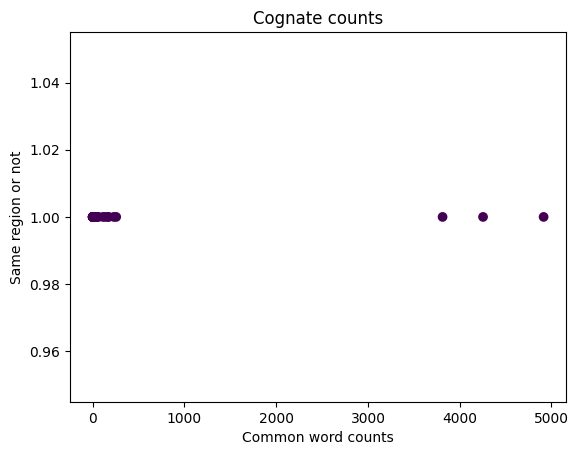

Lets look at original number of concepts for each language above independently:
swe : 14850
fin : 28240
rmf : 3
krl : 84


In [42]:
# Comparing
visualize_cognate_counts(lang_in_fi,[],fi_lang2lang_concepts,countrywise=True)

In [43]:
visualize_countrywise_lang(fi_lang2lang_concepts,lang_in_fi)

    swe   rus rmf krl  sme sms smn  tat   fin
swe  {}  3813   1  21  256  33  20  137  4914
rus  {}    {}   1  19  166  42  13  173  4254
rmf  {}    {}  {}   0    0   0   0    1     0
krl  {}    {}  {}  {}   10   5   1    6    62
sme  {}    {}  {}  {}   {}  34  50   27   230
sms  {}    {}  {}  {}   {}  {}  40    4    40
smn  {}    {}  {}  {}   {}  {}  {}    3    26
tat  {}    {}  {}  {}   {}  {}  {}   {}   112
fin  {}    {}  {}  {}   {}  {}  {}   {}    {}


#### Indonesia

In [44]:
lang_in_id = list(country2lang['ID'])
print("Languages identified in Indonesia:\n", lang_in_id)
print(len(lang_in_id), " languages were identified")

id_lang2lang_concepts = create_country_lang2lang_concepts(lang_in_id)

Languages identified in Indonesia:
 ['min', 'sne', 'bug', 'ban', 'ace', 'aoz', 'tet', 'jav', 'mad', 'bjn', 'ind', 'sun']
12  languages were identified


For laguages in same locations, maximum common cognates are found between:  jav  and  ind .
 Total borrowed words in dataset:  312
For laguages in same locations, minimum common cognates are found between:  min  and  sne .
 Total borrowed words in dataset:  0


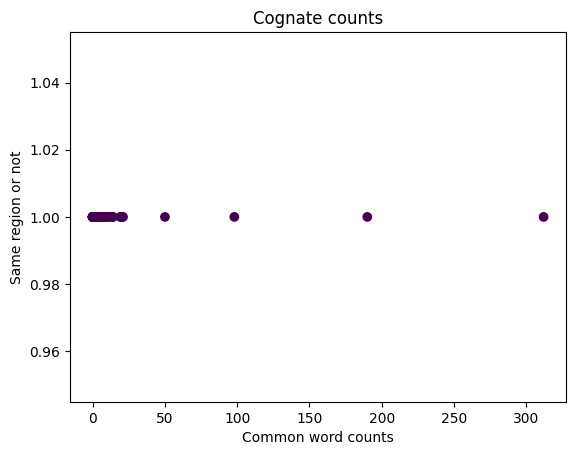

Lets look at original number of concepts for each language above independently:
jav : 368
ind : 31368
min : 26
sne : 13


In [45]:
# Comparing
visualize_cognate_counts(lang_in_id,[],id_lang2lang_concepts,countrywise=True)

In [46]:
visualize_countrywise_lang(id_lang2lang_concepts,lang_in_id)

    min sne bug ban ace aoz tet jav mad bjn  ind  sun
min  {}   0   1   4   6   0   0  11   4   7   20    6
sne  {}  {}   0   0   0   0   0   1   0   0    9    0
bug  {}  {}  {}   1   2   1   2   5   1   1    7    4
ban  {}  {}  {}  {}   2   1   1   7   2   1   12    3
ace  {}  {}  {}  {}  {}   2   2   9   3   1   14    4
aoz  {}  {}  {}  {}  {}  {}   0   1   0   0    2    0
tet  {}  {}  {}  {}  {}  {}  {}  21   1   1   50   19
jav  {}  {}  {}  {}  {}  {}  {}  {}   7  14  312   98
mad  {}  {}  {}  {}  {}  {}  {}  {}  {}   2    4    2
bjn  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}   20    7
ind  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}   {}  190
sun  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}   {}   {}


#### UK

In [47]:
lang_in_uk2 = list(country2lang['GB'])
print("Languages identified in UK:\n", lang_in_uk2)
print(len(lang_in_uk2), " languages were identified")

uk2_lang2lang_concepts = create_country_lang2lang_concepts(lang_in_uk2)

Languages identified in UK:
 ['gle', 'sco', 'gla', 'cym', 'glv', 'eng', 'cor']
7  languages were identified


For laguages in same locations, maximum common cognates are found between:  gle  and  eng .
 Total borrowed words in dataset:  1690
For laguages in same locations, minimum common cognates are found between:  sco  and  glv .
 Total borrowed words in dataset:  86


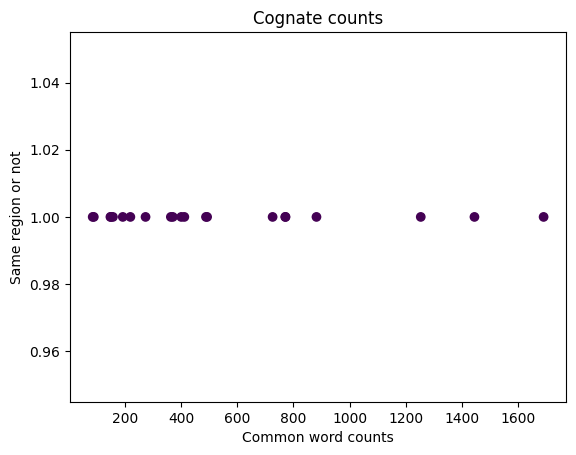

Lets look at original number of concepts for each language above independently:
gle : 3091
eng : 64241
sco : 519
glv : 1402


In [48]:
# Comparing
visualize_cognate_counts(lang_in_uk2,[],uk2_lang2lang_concepts,countrywise=True)

In [49]:
visualize_countrywise_lang(uk2_lang2lang_concepts,lang_in_uk2)

    gle  sco   gla  cym  glv   eng  cor
gle  {}  158  1444  726  771  1690  274
sco  {}   {}   151  149   86   401   90
gla  {}   {}    {}  493  489   772  220
cym  {}   {}    {}   {}  364  1253  412
glv  {}   {}    {}   {}   {}   882  193
eng  {}   {}    {}   {}   {}    {}  371
cor  {}   {}    {}   {}   {}    {}   {}


### All country % map

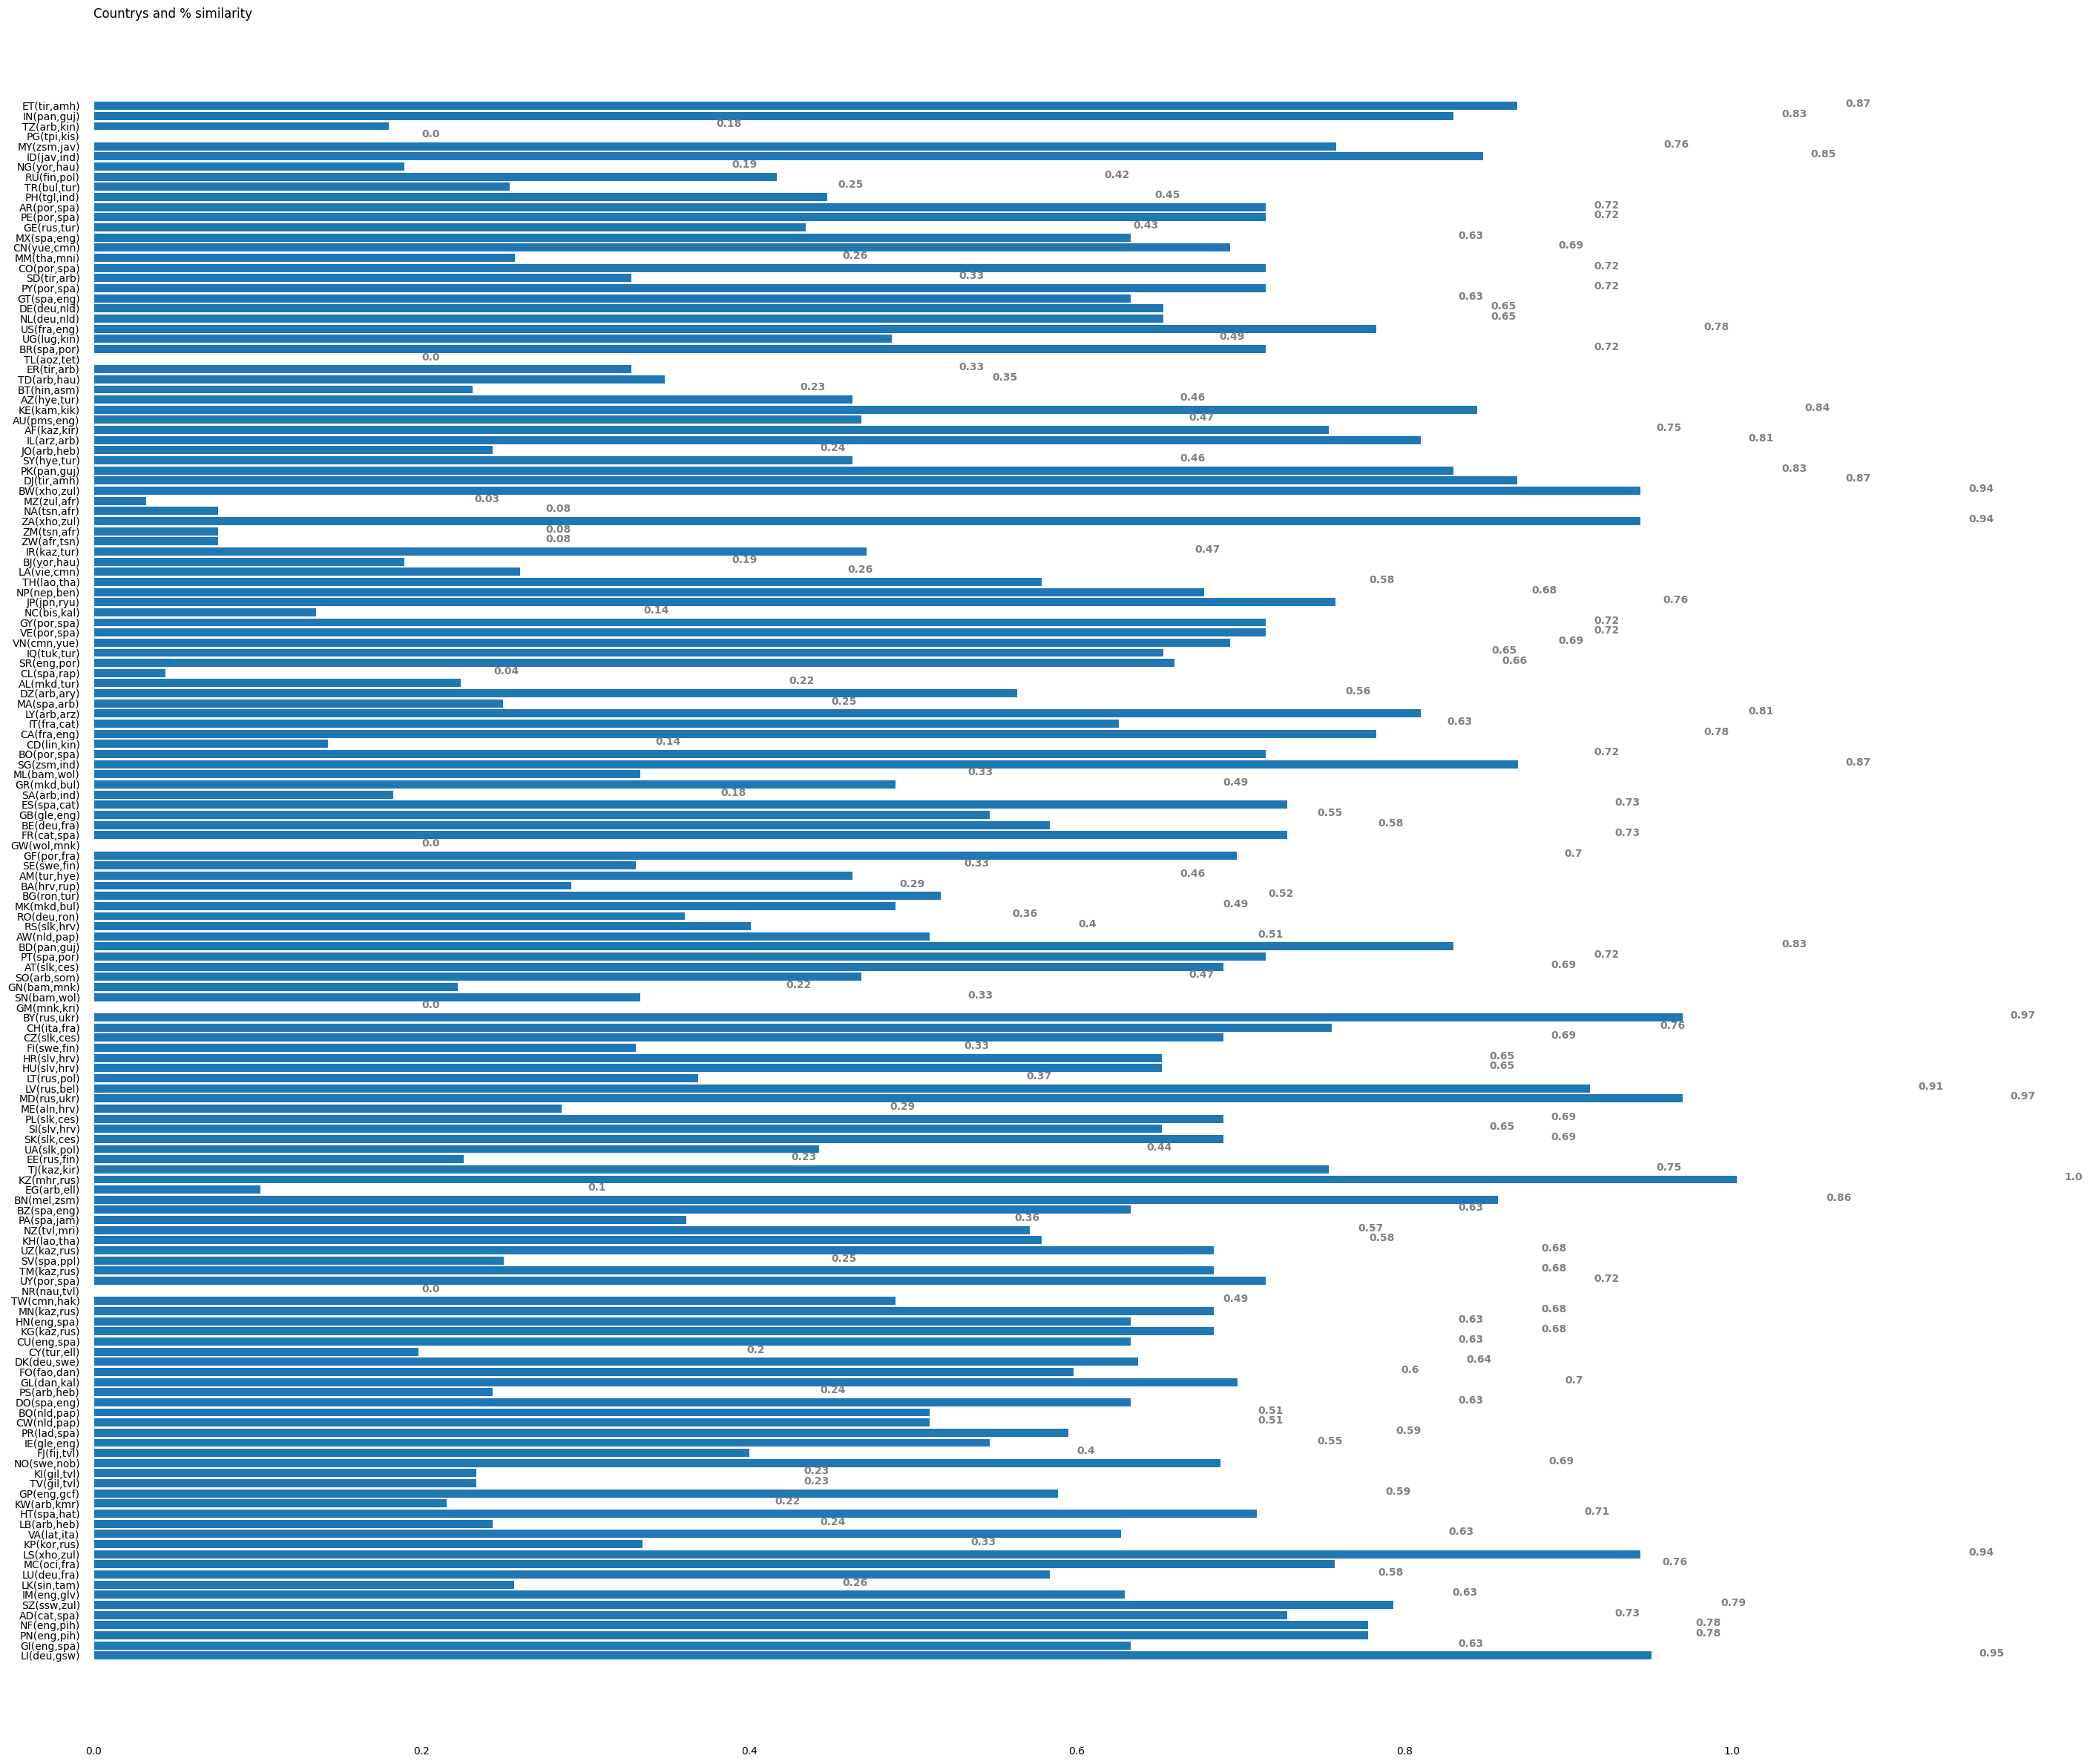

In [93]:
def find_max_counts(l,l2lc):
  max_pair_cnts = 0
  max_lang1 = ''
  max_lang2 = ''

  for i in range(len(l)):
    for j in range(i+1,len(l)):
      if(max_pair_cnts <= l2lc[i][j]):
        max_pair_cnts=l2lc[i][j]
        max_lang1=l[i]
        max_lang2=l[j]
  t_lang1 = len(lang2concept_map[max_lang1])
  t_lang2 = len(lang2concept_map[max_lang2])

  return max_lang1,t_lang1,max_lang2,t_lang2,max_pair_cnts

max_cognate_langs=[]
percents =[]
cntrys_considered=[]
for country in country2lang.keys():
  langs = list(country2lang[country])
  if len(langs)<2:
    continue
  country_lang2lang_concepts = create_country_lang2lang_concepts(langs)
  lang1,lang1_cnts,lang2,lang2_cnts,max_count = find_max_counts(langs,country_lang2lang_concepts)
  percent = max_count/min(lang1_cnts,lang2_cnts)
  max_cognate_langs.append(tuple((lang1,lang2)))
  percents.append(percent)
  cntrys_considered.append(country+"("+lang1+","+lang2+")")

# Figure Size
fig, ax = plt.subplots(figsize=(30, 30))

# Horizontal Bar Plot
ax.barh(cntrys_considered, percents)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# # Add x, y gridlines
# ax.grid(b = True, color ='grey',
#         linestyle ='-.', linewidth = 0.5,
#         alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Countrys and % similarity',
             loc ='left', )

# # Add Text watermark
# fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
#          color ='grey', ha ='right', va ='bottom',
#          alpha = 0.7)

# Show Plot
plt.show()



In [94]:
f2 = dict(sorted(dict(zip(cntrys_considered, percents)).items(), key=lambda x:x[1]))
top_cntrs= list(f2.keys())
top_scores= list(f2.values())

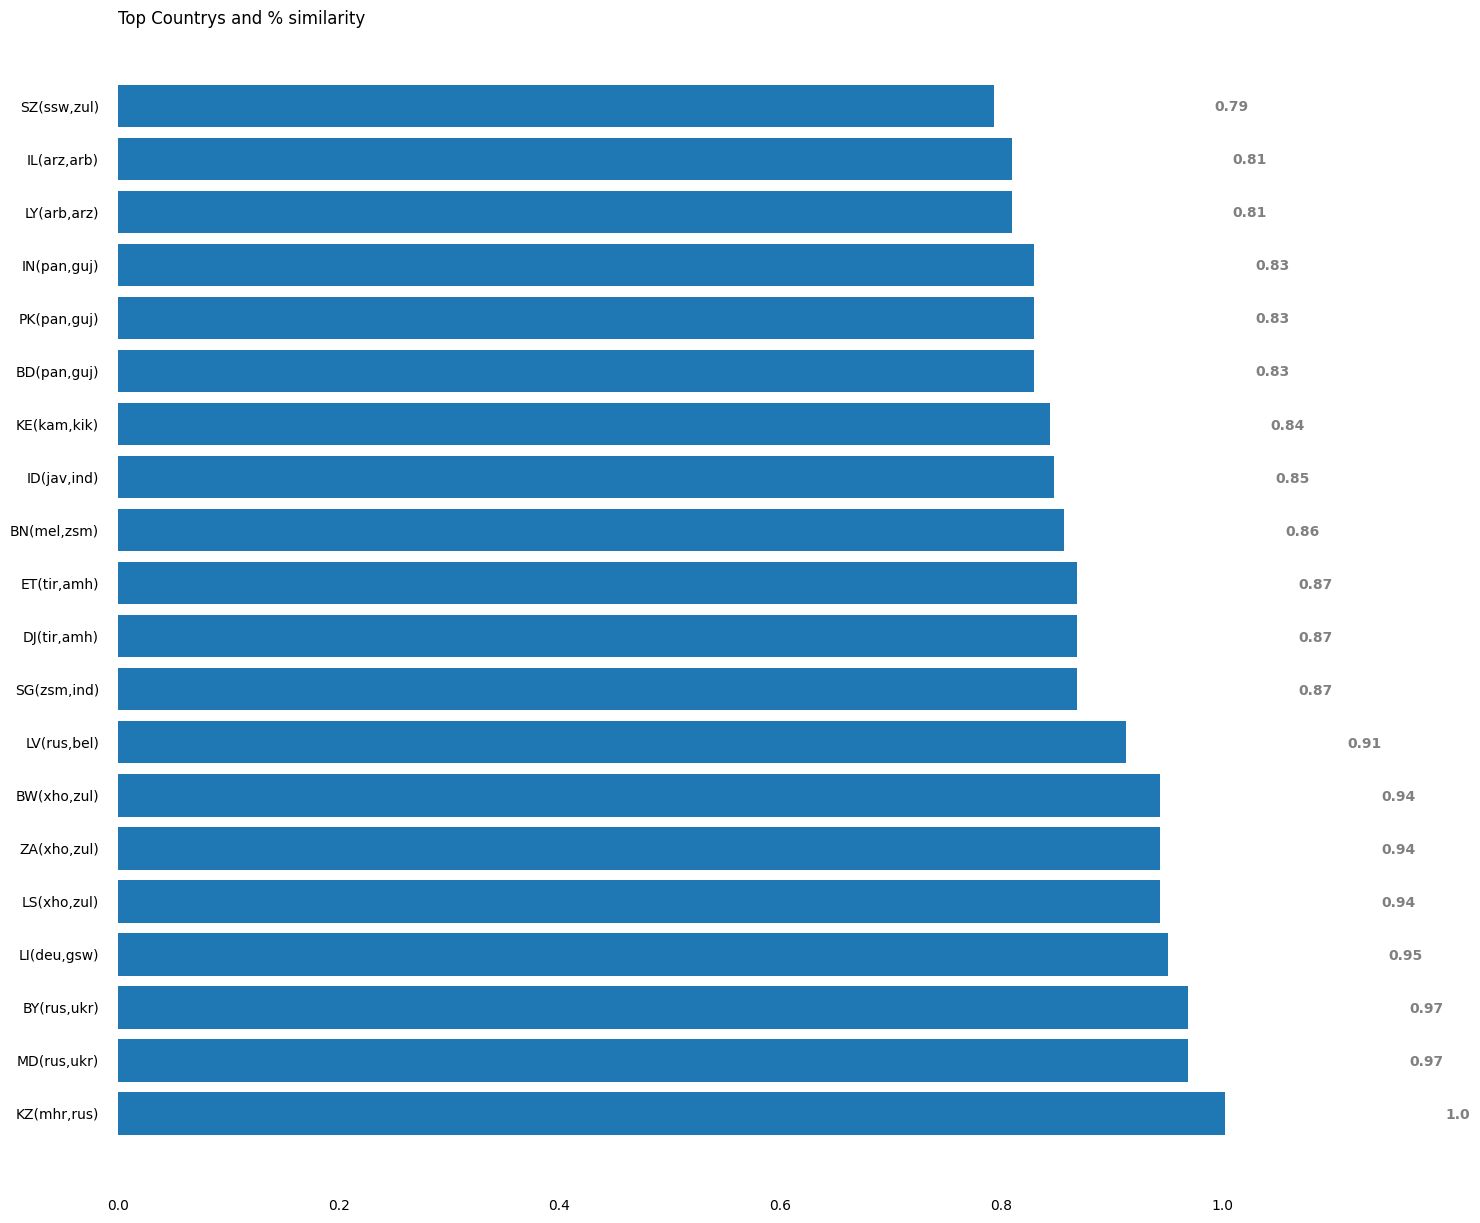

In [95]:
# Figure Size
fig, ax = plt.subplots(figsize=(15, 15))

# Horizontal Bar Plot
ax.barh(top_cntrs[-20:], top_scores[-20:])

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# # Add x, y gridlines
# ax.grid(b = True, color ='grey',
#         linestyle ='-.', linewidth = 0.5,
#         alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Top Countrys and % similarity',
             loc ='left', )

# # Add Text watermark
# fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
#          color ='grey', ha ='right', va ='bottom',
#          alpha = 0.7)

# Show Plot
plt.show()

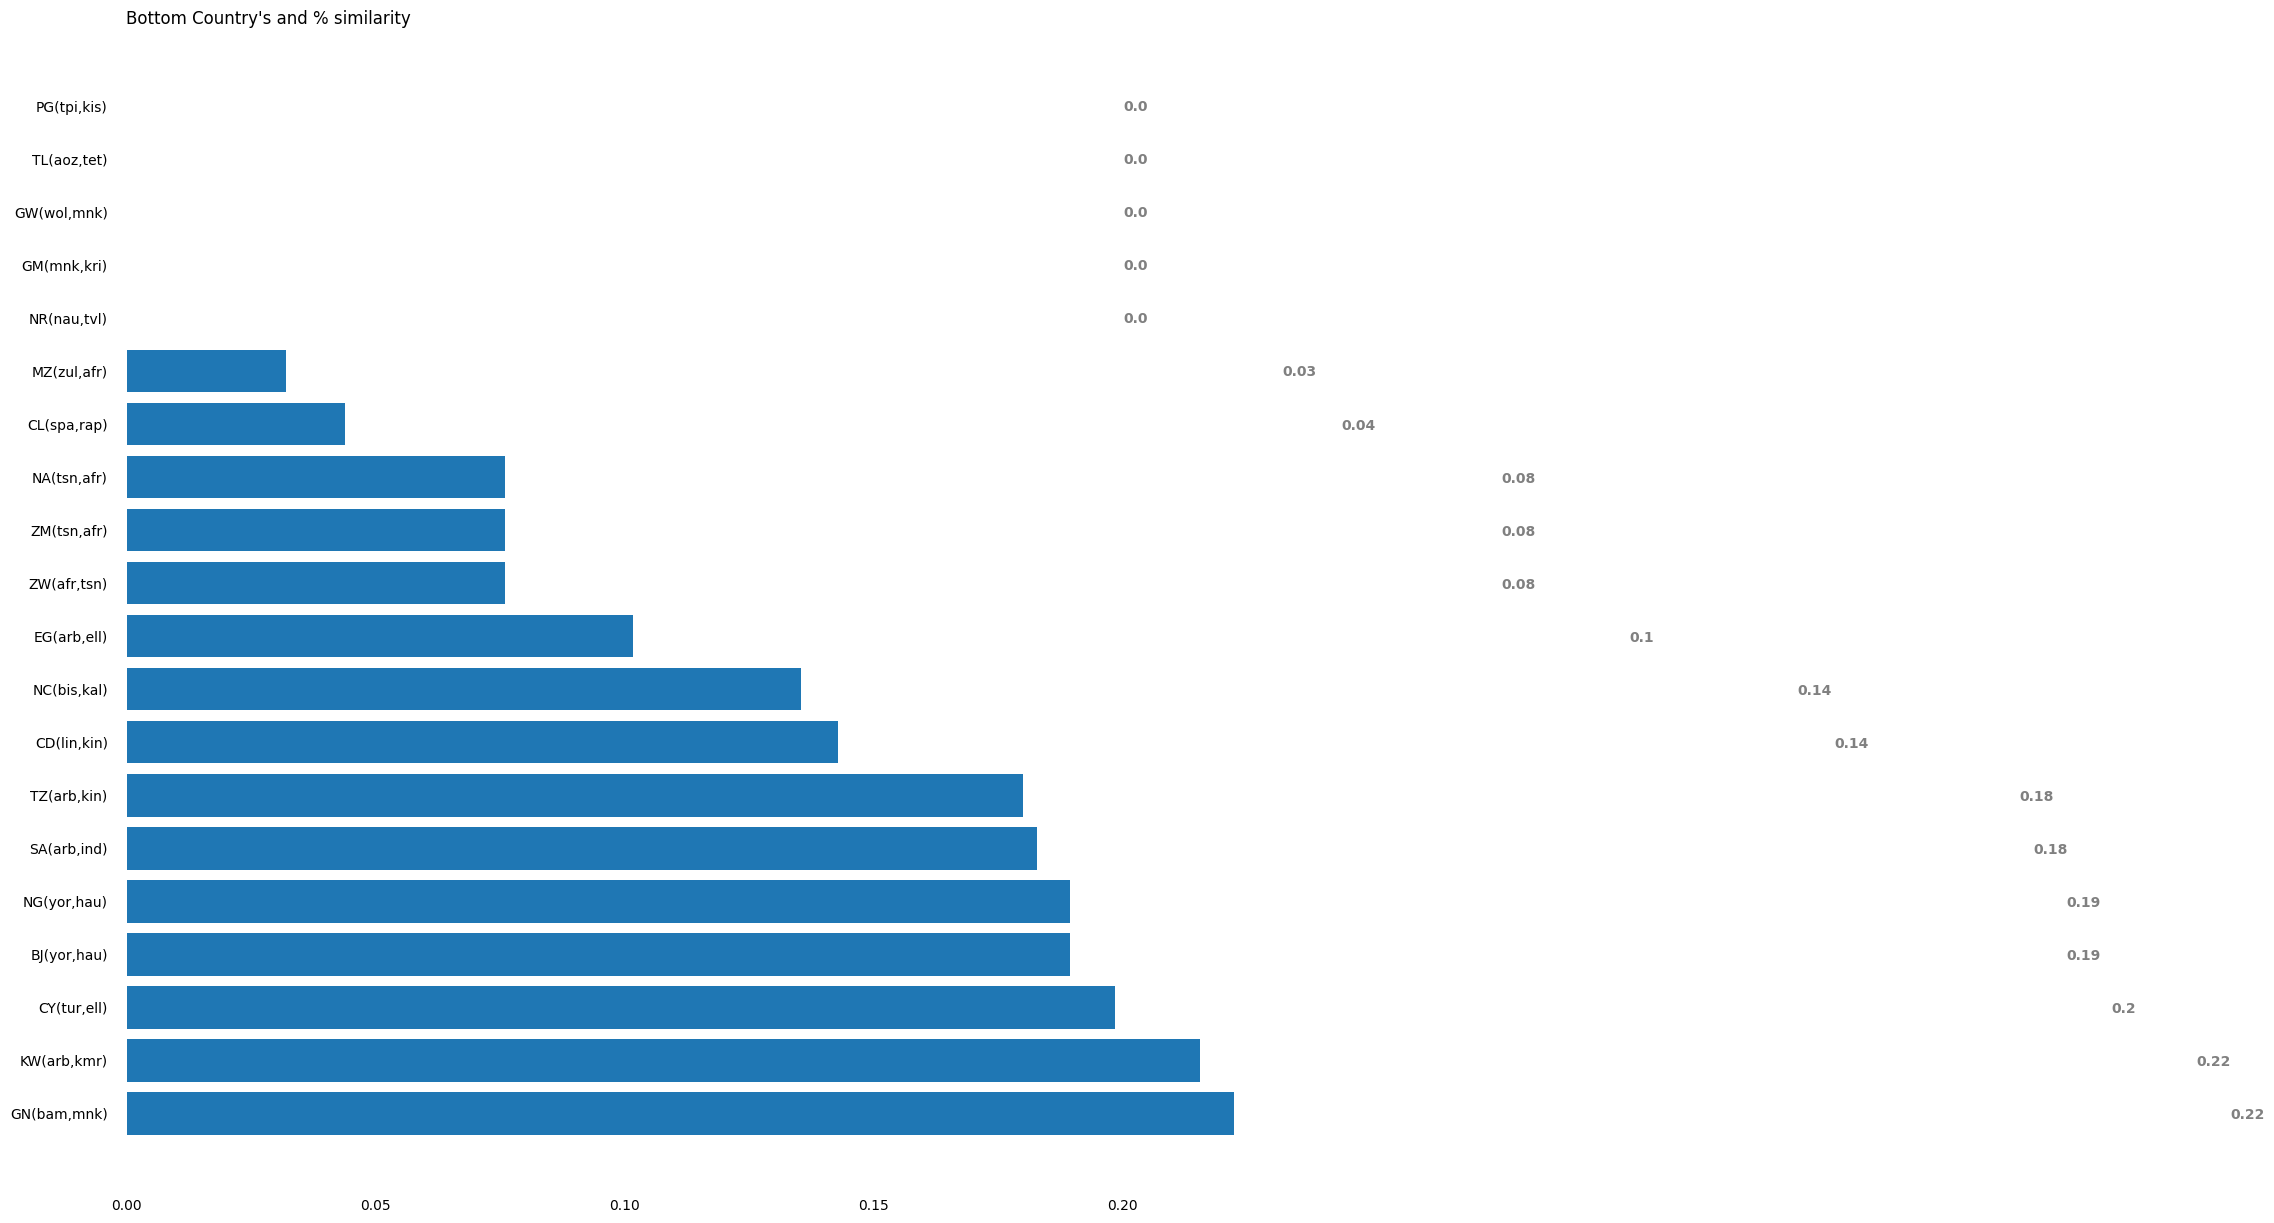

In [97]:
# Figure Size
fig, ax = plt.subplots(figsize=(15, 15))

# Horizontal Bar Plot
ax.barh(top_cntrs[:20], top_scores[:20])

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# # Add x, y gridlines
# ax.grid(b = True, color ='grey',
#         linestyle ='-.', linewidth = 0.5,
#         alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title("Bottom Country's and % similarity",
             loc ='left', )

# # Add Text watermark
# fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
#          color ='grey', ha ='right', va ='bottom',
#          alpha = 0.7)

# Show Plot
plt.show()